# A. Transform data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf


import datetime as dt
import numpy as np
import plotly.graph_objects as go
from datetime import date, datetime, timedelta
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import  MinMaxScaler
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [3]:
covidDf = pd.read_csv('covid_data.csv')
vaksinDf = pd.read_csv('vaksin_data.csv')

In [4]:
mergedDf = pd.merge(covidDf, vaksinDf, on = ["key", "key_as_string"] )
mergedDf = mergedDf.drop(columns=['key','jumlah_positif_kum', 'jumlah_dirawat_kum', 'jumlah_sembuh_kum', 'jumlah_meninggal_kum', 'doc_count_x', 'jumlah_vaksinasi_1', 'jumlah_vaksinasi_2', 'doc_count_y'])

In [5]:
mergedDf

,key_as_string,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_jumlah_vaksinasi_1_kum,jumlah_jumlah_vaksinasi_2_kum
0,2021-02-01,279,10461,10994,254,0,0
1,2021-02-02,304,12848,10379,2773,0,0
2,2021-02-03,189,9135,11984,2660,0,0
3,2021-02-04,231,11641,11434,438,0,0
4,2021-02-05,201,9674,11749,1874,0,0
...,...,...,...,...,...,...,...
662,2022-11-25,35,6752,5976,811,205409201,172384615
663,2022-11-26,41,6360,5469,932,205409201,172384615
664,2022-11-27,35,5655,4151,1539,205409201,172384615
665,2022-11-28,59,5864,3225,2698,203715848,174119714


In [6]:
mergedDf = mergedDf[mergedDf["jumlah_jumlah_vaksinasi_1_kum"] > 0]

mergedDf["jumlah_jumlah_vaksinasi_1_kum"] = mergedDf["jumlah_jumlah_vaksinasi_1_kum"] - mergedDf["jumlah_jumlah_vaksinasi_2_kum"]
mergedDf = mergedDf.rename(columns = {"key_as_string": "tanggal","jumlah_jumlah_vaksinasi_1_kum" : "jumlah_vaksinasi_1_saja_kumulatif", "jumlah_jumlah_vaksinasi_2_kum":"jumlah_vaksinasi_2_kumulatif"})
mergedDf = mergedDf.reset_index(drop = True)
mergedDf["days_since"] = [datetime.strptime(x, "%Y-%m-%d") - datetime.strptime(mergedDf["tanggal"].iloc[0], "%Y-%m-%d") for x in mergedDf["tanggal"]]
mergedDf

,tanggal,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_vaksinasi_1_saja_kumulatif,jumlah_vaksinasi_2_kumulatif,days_since
0,2021-03-15,147,6830,5589,1388,2594076,1572786,0 days
1,2021-03-16,180,7716,5414,2482,2752202,1716749,1 days
2,2021-03-17,162,9010,6825,2347,2829108,1876140,2 days
3,2021-03-18,227,6285,6570,58,2890221,1948531,3 days
4,2021-03-19,197,6007,6279,75,2890663,2068400,4 days
...,...,...,...,...,...,...,...,...
620,2022-11-25,35,6752,5976,811,33024586,172384615,620 days
621,2022-11-26,41,6360,5469,932,33024586,172384615,621 days
622,2022-11-27,35,5655,4151,1539,33024586,172384615,622 days
623,2022-11-28,59,5864,3225,2698,29596134,174119714,623 days


# B. Features correlation

## 1. Heatmap

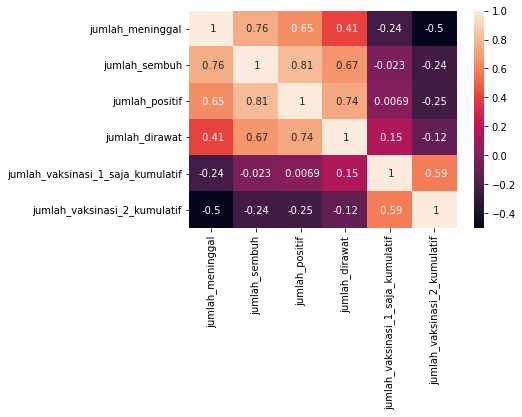

In [7]:
sns.heatmap(mergedDf.corr(), annot=True, fmt= ' .2g')

## 2. Scatter plot

### Vaksinasi - Jumlah positif

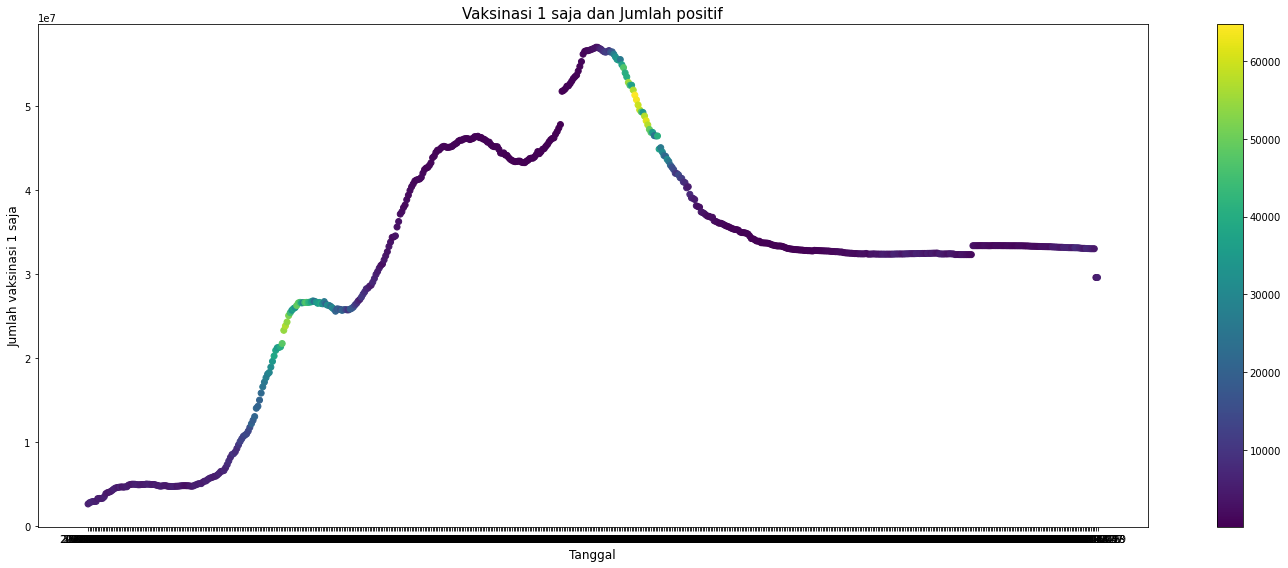

In [8]:
# Vaksinasi 1 saja - jumlah positif

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x=mergedDf['tanggal'], y=mergedDf['jumlah_vaksinasi_1_saja_kumulatif'], c=mergedDf['jumlah_positif'], cmap='viridis')
plt.xlabel('Tanggal', fontsize = 12)
plt.ylabel('Jumlah vaksinasi 1 saja', fontsize = 12)
plt.title('Vaksinasi 1 saja dan Jumlah positif', fontsize = 15)
plt.colorbar()
plt.show()

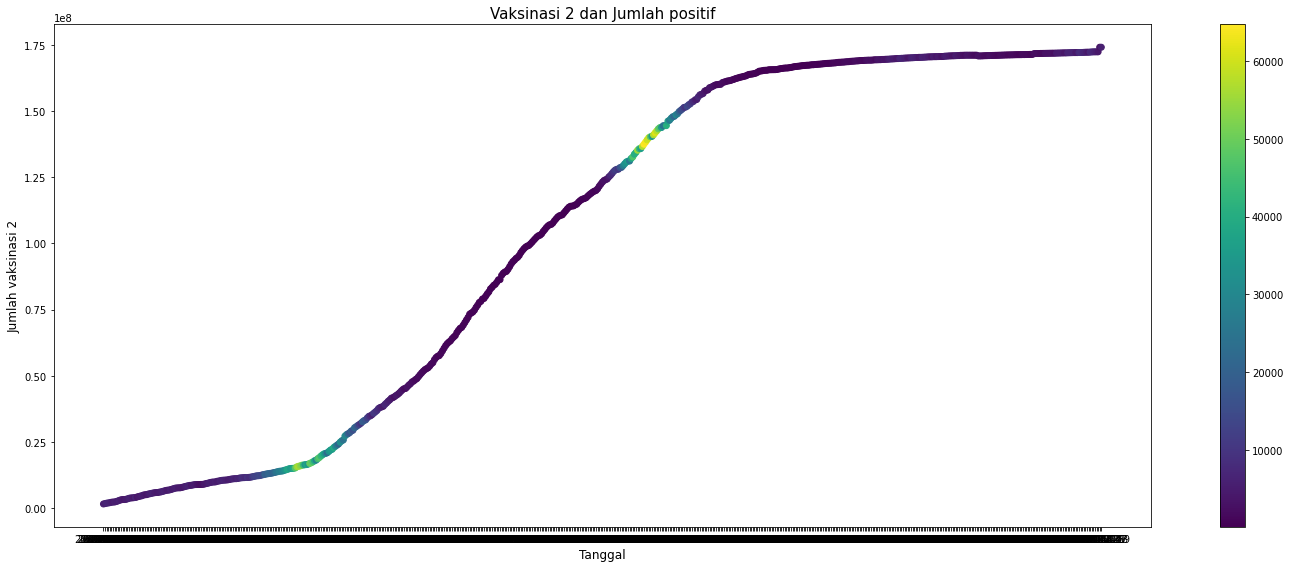

In [9]:
# Vaksinasi 2 - jumlah positif

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x=mergedDf['tanggal'], y=mergedDf['jumlah_vaksinasi_2_kumulatif'], c=mergedDf['jumlah_positif'], cmap='viridis')
plt.xlabel('Tanggal', fontsize = 12)
plt.ylabel('Jumlah vaksinasi 2', fontsize = 12)
plt.title('Vaksinasi 2 dan Jumlah positif', fontsize = 15)
plt.colorbar()
plt.show()

### Vaksinasi - Jumlah meninggal

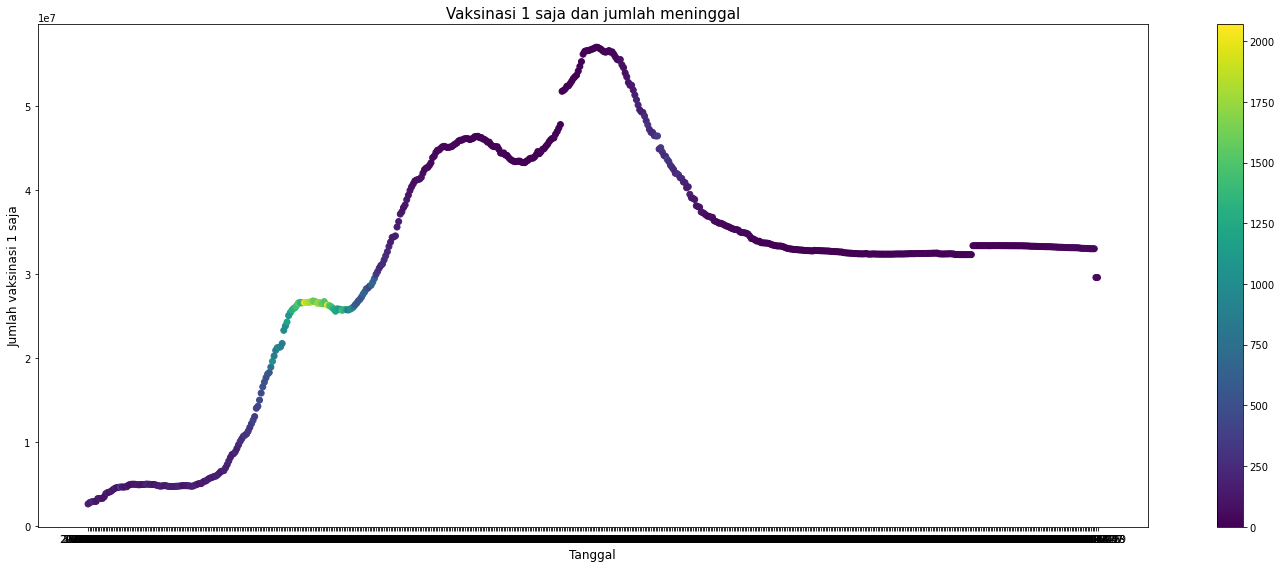

In [10]:
# Vaksinasi 1 saja - jumlah meninggal

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x=mergedDf['tanggal'], y=mergedDf['jumlah_vaksinasi_1_saja_kumulatif'], c=mergedDf['jumlah_meninggal'], cmap='viridis')
plt.xlabel('Tanggal', fontsize = 12)
plt.ylabel('Jumlah vaksinasi 1 saja', fontsize = 12)
plt.title('Vaksinasi 1 saja dan jumlah meninggal', fontsize = 15)
plt.colorbar()
plt.show()

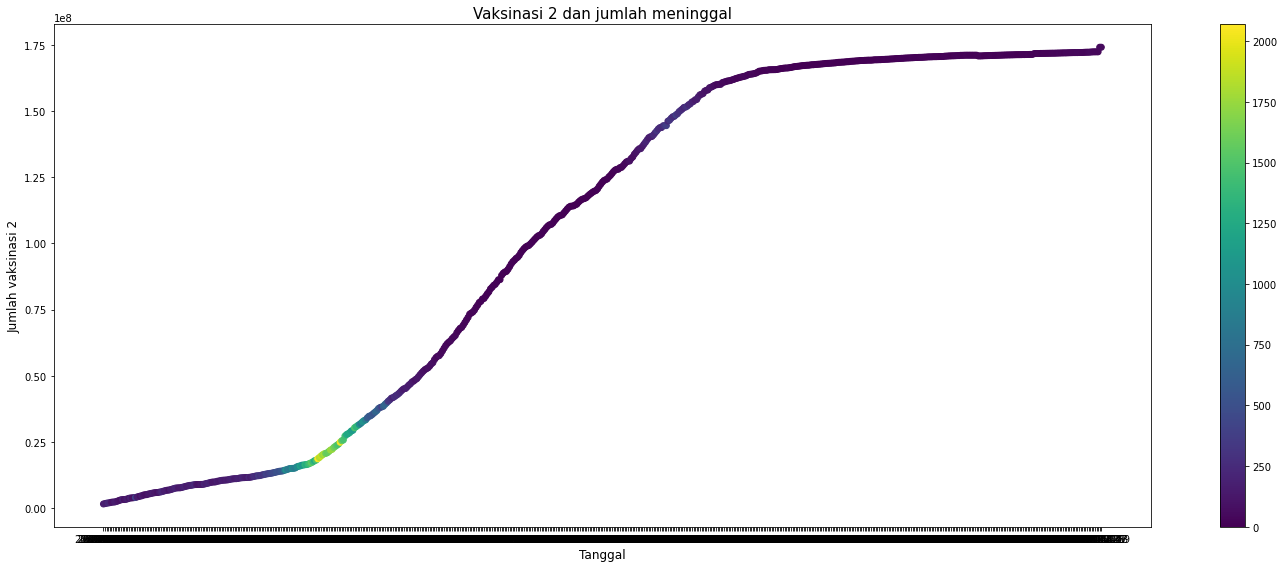

In [11]:
# Vaksinasi 2 - jumlah meninggal

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x=mergedDf['tanggal'], y=mergedDf['jumlah_vaksinasi_2_kumulatif'], c=mergedDf['jumlah_meninggal'], cmap='viridis')
plt.xlabel('Tanggal', fontsize = 12)
plt.ylabel('Jumlah vaksinasi 2', fontsize = 12)
plt.title('Vaksinasi 2 dan jumlah meninggal', fontsize = 15)
plt.colorbar()
plt.show()

### Vaksinasi - Jumlah sebuh

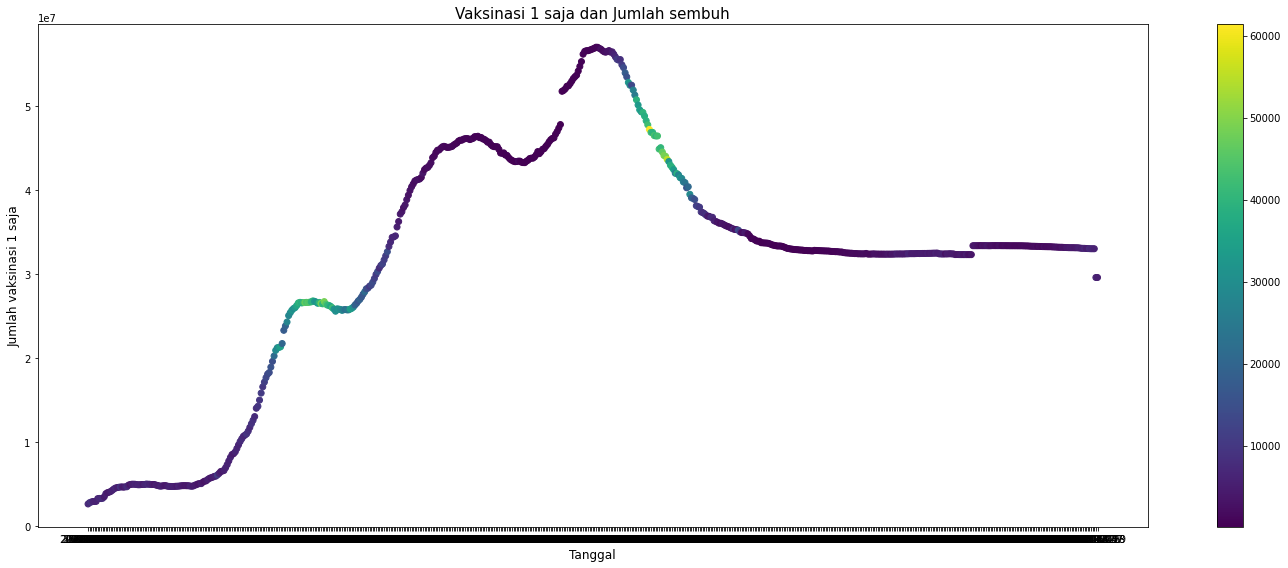

In [12]:
# Vaksinasi 1 saja - jumlah sembuh

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x=mergedDf['tanggal'], y=mergedDf['jumlah_vaksinasi_1_saja_kumulatif'], c=mergedDf['jumlah_sembuh'], cmap='viridis')
plt.xlabel('Tanggal', fontsize = 12)
plt.ylabel('Jumlah vaksinasi 1 saja', fontsize = 12)
plt.title('Vaksinasi 1 saja dan Jumlah sembuh', fontsize = 15)
plt.colorbar()
plt.show()

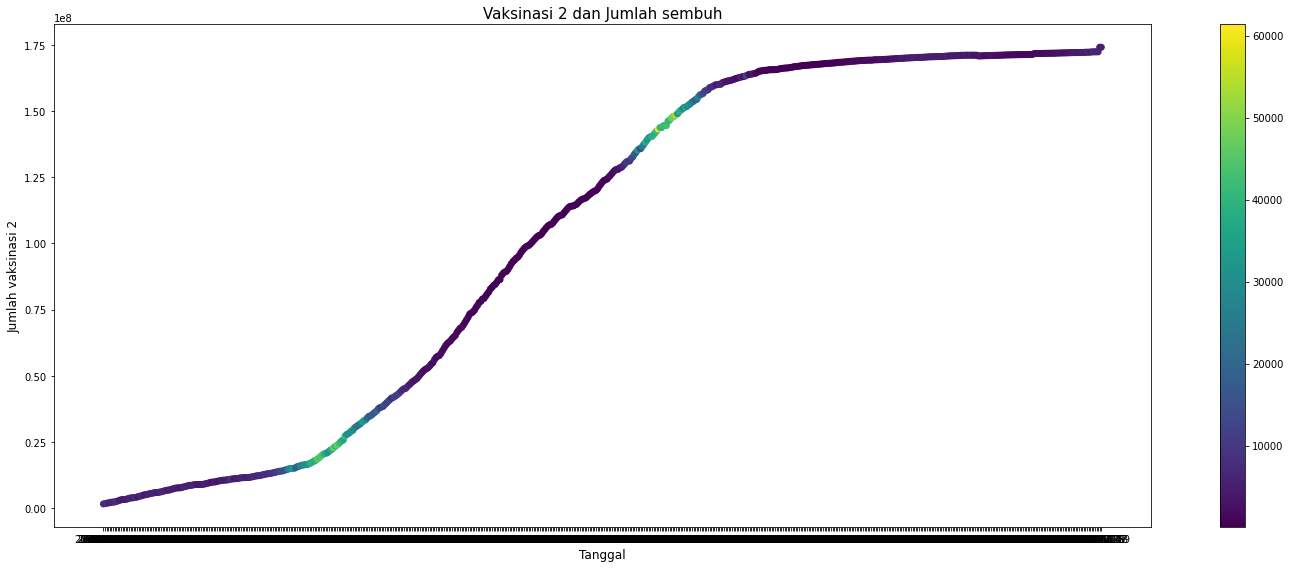

In [13]:
# Vaksinasi 2 - jumlah sembuh

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x=mergedDf['tanggal'], y=mergedDf['jumlah_vaksinasi_2_kumulatif'], c=mergedDf['jumlah_sembuh'], cmap='viridis')
plt.xlabel('Tanggal', fontsize = 12)
plt.ylabel('Jumlah vaksinasi 2', fontsize = 12)
plt.title('Vaksinasi 2 dan Jumlah sembuh', fontsize = 15)
plt.colorbar()
plt.show()

### Vaksinasi - Jumlah dirawat

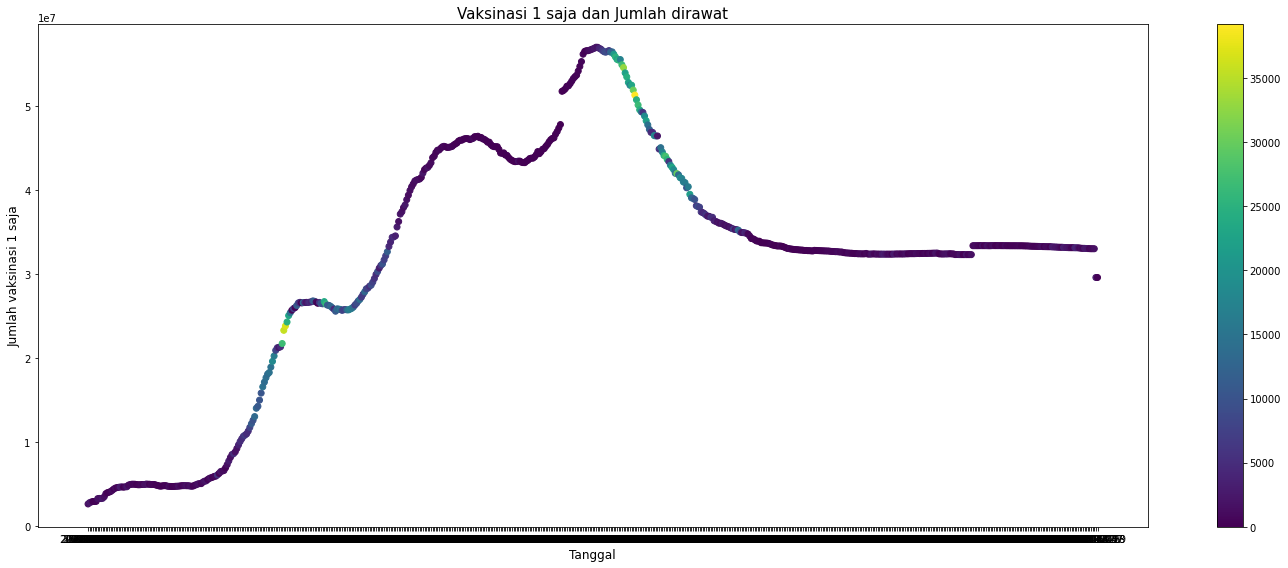

In [14]:
# Vaksinasi 1 saja - jumlah dirawat

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x=mergedDf['tanggal'], y=mergedDf['jumlah_vaksinasi_1_saja_kumulatif'], c=mergedDf['jumlah_dirawat'], cmap='viridis')
plt.xlabel('Tanggal', fontsize = 12)
plt.ylabel('Jumlah vaksinasi 1 saja', fontsize = 12)
plt.title('Vaksinasi 1 saja dan Jumlah dirawat', fontsize = 15)
plt.colorbar()
plt.show()

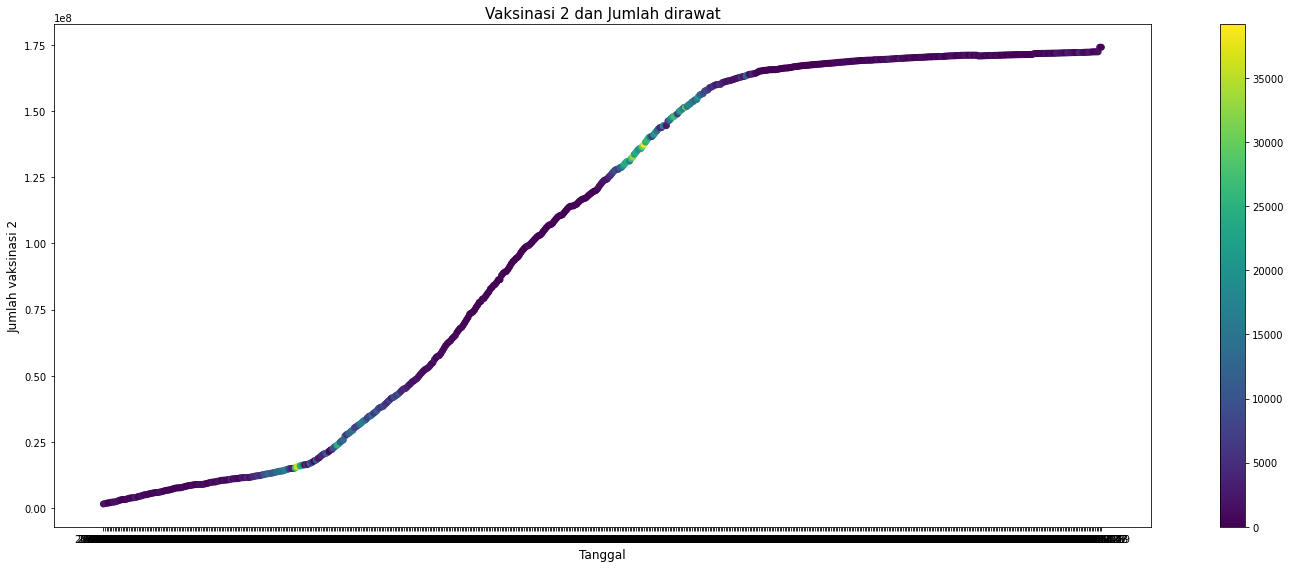

In [15]:
# Vaksinasi 2 - jumlah dirawat

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x=mergedDf['tanggal'], y=mergedDf['jumlah_vaksinasi_2_kumulatif'], c=mergedDf['jumlah_dirawat'], cmap='viridis')
plt.xlabel('Tanggal', fontsize = 12)
plt.ylabel('Jumlah vaksinasi 2', fontsize = 12)
plt.title('Vaksinasi 2 dan Jumlah dirawat', fontsize = 15)
plt.colorbar()
plt.show()

# C. Prediction

## Holt's Linear Model Prediction

In [ ]:
model_train=mergedDf.iloc[:int(mergedDf.shape[0]*0.95)]
valid=mergedDf.iloc[int(mergedDf.shape[0]*0.95):]
y_pred=valid.copy()
model_scores=[]

In [ ]:
#1   jumlah_meninggal                         
holt=Holt(np.asarray(model_train["jumlah_meninggal"])).fit(smoothing_level=0.4, smoothing_trend=0.4,optimized=False) 

y_pred["Holt"]=holt.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["jumlah_meninggal"],y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["jumlah_meninggal"],y_pred["Holt"]))) 

fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.tanggal, y=model_train["jumlah_meninggal"], mode='lines+markers',name="Train Data for Jumlah meninggal"))
fig.add_trace(go.Scatter(x=valid.tanggal, y=valid["jumlah_meninggal"], mode='lines+markers',name="Validation Data for Jumlah meninggal",))
fig.add_trace(go.Scatter(x=valid.tanggal, y=y_pred["Holt"], mode='lines+markers',name="Prediction of Jumlah meninggal",))
fig.update_layout(title="JUmlah meninggal Holt's Linear Model Prediction", xaxis_title="Date",yaxis_title="Jumlah meninggal",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Root Mean Square Error Holt's Linear Model:  8.627204740592799


In [ ]:
#2   jumlah_sembuh                           
holt=Holt(np.asarray(model_train["jumlah_sembuh"])).fit(smoothing_level=0.4, smoothing_trend=0.4,optimized=False) 

y_pred["Holt"]=holt.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["jumlah_sembuh"],y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["jumlah_sembuh"],y_pred["Holt"]))) 

fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.tanggal, y=model_train["jumlah_sembuh"], mode='lines+markers',name="Train Data for Jumlah sembuh"))
fig.add_trace(go.Scatter(x=valid.tanggal, y=valid["jumlah_sembuh"], mode='lines+markers',name="Validation Data for Jumlah sembuh",))
fig.add_trace(go.Scatter(x=valid.tanggal, y=y_pred["Holt"], mode='lines+markers',name="Prediction of Jumlah sembuh",))
fig.update_layout(title="Jumlah sembuh Holt's Linear Model Prediction", xaxis_title="Date",yaxis_title="Jumlah sembuh",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Root Mean Square Error Holt's Linear Model:  1815.0590668520424


In [ ]:
#3   jumlah_positif                          
holt=Holt(np.asarray(model_train["jumlah_positif"])).fit(smoothing_level=0.4, smoothing_trend=0.4,optimized=False) 

y_pred["Holt"]=holt.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["jumlah_positif"],y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["jumlah_positif"],y_pred["Holt"]))) 

fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.tanggal, y=model_train["jumlah_positif"], mode='lines+markers',name="Train Data for Jumlah positif"))
fig.add_trace(go.Scatter(x=valid.tanggal, y=valid["jumlah_positif"], mode='lines+markers',name="Validation Data for Jumlah positif",))
fig.add_trace(go.Scatter(x=valid.tanggal, y=y_pred["Holt"], mode='lines+markers',name="Prediction of Jumlah positif",))
fig.update_layout(title="Jumlah positif Holt's Linear Model Prediction", xaxis_title="Date",yaxis_title="Jumlah positif",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Root Mean Square Error Holt's Linear Model:  2161.7117733883665


In [ ]:
#4   jumlah_dirawat                       
holt=Holt(np.asarray(model_train["jumlah_dirawat"])).fit(smoothing_level=0.4, smoothing_trend=0.4,optimized=False) 

y_pred["Holt"]=holt.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["jumlah_dirawat"],y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["jumlah_dirawat"],y_pred["Holt"]))) 

fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.tanggal, y=model_train["jumlah_dirawat"], mode='lines+markers',name="Train Data for Jumlah dirawat"))
fig.add_trace(go.Scatter(x=valid.tanggal, y=valid["jumlah_dirawat"], mode='lines+markers',name="Validation Data for Jumlah dirawat",))
fig.add_trace(go.Scatter(x=valid.tanggal, y=y_pred["Holt"], mode='lines+markers',name="Prediction of Jumlah dirawat",))
fig.update_layout(title="Jumlah dirawat Holt's Linear Model Prediction", xaxis_title="Date",yaxis_title="Jumlah dirawat",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Root Mean Square Error Holt's Linear Model:  1313.9042316455095


In [ ]:
#5   jumlah_vaksinasi_1_saja_kumulatif    
holt=Holt(np.asarray(model_train["jumlah_vaksinasi_1_saja_kumulatif"])).fit(smoothing_level=0.4, smoothing_trend=0.4,optimized=False) 

y_pred["Holt"]=holt.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["jumlah_vaksinasi_1_saja_kumulatif"],y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["jumlah_vaksinasi_1_saja_kumulatif"],y_pred["Holt"]))) 

fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.tanggal, y=model_train["jumlah_vaksinasi_1_saja_kumulatif"], mode='lines+markers',name="Train Data for Jumlah vaksin 1 saja kumulatif"))
fig.add_trace(go.Scatter(x=valid.tanggal, y=valid["jumlah_vaksinasi_1_saja_kumulatif"], mode='lines+markers',name="Validation Data for Jumlah vaksin 1 saja kumulatif",))
fig.add_trace(go.Scatter(x=valid.tanggal, y=y_pred["Holt"], mode='lines+markers',name="Prediction of Jumlah vaksin 1 saja kumulatif",))
fig.update_layout(title="Jumlah vaksin 1 saja kumulatif Holt's Linear Model Prediction", xaxis_title="Date",yaxis_title="Jumlah vaksin 1 saja kumulatif",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Root Mean Square Error Holt's Linear Model:  869958.0480689817


In [ ]:
#6   jumlah_vaksinasi_2_kumulatif     
holt=Holt(np.asarray(model_train["jumlah_vaksinasi_2_kumulatif"])).fit(smoothing_level=0.4, smoothing_trend=0.4,optimized=False) 

y_pred["Holt"]=holt.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["jumlah_vaksinasi_2_kumulatif"],y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["jumlah_vaksinasi_2_kumulatif"],y_pred["Holt"]))) 

fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.tanggal, y=model_train["jumlah_vaksinasi_2_kumulatif"], mode='lines+markers',name="Train Data for Jumlah vaksin 2 kumulatif"))
fig.add_trace(go.Scatter(x=valid.tanggal, y=valid["jumlah_vaksinasi_2_kumulatif"], mode='lines+markers',name="Validation Data for Jumlah vaksin 2 kumulatif",))
fig.add_trace(go.Scatter(x=valid.tanggal, y=y_pred["Holt"], mode='lines+markers',name="Prediction of Jumlah vaksin 2 kumulatif",))
fig.update_layout(title="Jumlah vaksin 2 kumulatif Holt's Linear Model Prediction", xaxis_title="Date",yaxis_title="Jumlah vaksin 2 kumulatif",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Root Mean Square Error Holt's Linear Model:  558998.6694186475


## Basic RNN


### Predicting Death with Vacination 1 and 2 as inputs

In [ ]:
train_df = mergedDf[["jumlah_meninggal", "jumlah_vaksinasi_1_saja_kumulatif", "jumlah_vaksinasi_2_kumulatif"]]
train_df

,jumlah_meninggal,jumlah_vaksinasi_1_saja_kumulatif,jumlah_vaksinasi_2_kumulatif
0,147,2594076,1572786
1,180,2752202,1716749
2,162,2829108,1876140
3,227,2890221,1948531
4,197,2890663,2068400
...,...,...,...
620,35,33024586,172384615
621,41,33024586,172384615
622,35,33024586,172384615
623,59,29596134,174119714


In [ ]:
valid_set_size_percentage = 10 
test_set_size_percentage = 10 
def normalize_data(df):
    min_max_scaler = MinMaxScaler()
    df['jumlah_meninggal'] = min_max_scaler.fit_transform(df.jumlah_meninggal.values.reshape(-1,1))
    df['jumlah_vaksinasi_1_saja_kumulatif'] = min_max_scaler.fit_transform(df.jumlah_vaksinasi_1_saja_kumulatif.values.reshape(-1,1))
    df['jumlah_vaksinasi_2_kumulatif'] = min_max_scaler.fit_transform(df.jumlah_vaksinasi_2_kumulatif.values.reshape(-1,1))
    return df

In [ ]:
def load_data(covid, seq_len):
    data_raw = covid.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

train_df_norm = normalize_data(train_df)
seq_len = 3 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(train_df, seq_len)

print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)


x_train.shape =  (498, 2, 3)
y_train.shape =  (498, 3)
x_valid.shape =  (62, 2, 3)
y_valid.shape =  (62, 3)
x_test.shape =  (62, 2, 3)
y_test.shape =  (62, 3)


In [ ]:
## Basic Cell RNN in tensorflow

index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# parameters
n_steps = seq_len-1 
n_inputs = len(train_df.columns) 
n_neurons = 200 
n_outputs = len(train_df.columns) 
n_layers = 3
learning_rate = 0.0001
batch_size = 5
n_epochs = 150
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.compat.v1.reset_default_graph()
tf.compat.v1.disable_eager_execution()
X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.compat.v1.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
layers = [tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
          for layer in range(n_layers)]

                                                                     
multi_layer_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(layers)
rnn_outputs, states = tf.compat.v1.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.compat.v1.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)
                                              
# run graph
with tf.compat.v1.Session() as sess: 
    sess.run(tf.compat.v1.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

0.00 epochs: MSE train/valid = 0.216523/0.358450
5.00 epochs: MSE train/valid = 0.000608/0.000051
10.00 epochs: MSE train/valid = 0.000640/0.000357
15.00 epochs: MSE train/valid = 0.000496/0.000109
20.00 epochs: MSE train/valid = 0.000591/0.000064
25.00 epochs: MSE train/valid = 0.000504/0.000192
30.00 epochs: MSE train/valid = 0.000469/0.000038
35.00 epochs: MSE train/valid = 0.000543/0.000390
40.00 epochs: MSE train/valid = 0.000481/0.000042
45.00 epochs: MSE train/valid = 0.000467/0.000014
50.00 epochs: MSE train/valid = 0.000483/0.000053
55.00 epochs: MSE train/valid = 0.000501/0.000047
60.00 epochs: MSE train/valid = 0.000507/0.000181
65.00 epochs: MSE train/valid = 0.000569/0.000160
70.00 epochs: MSE train/valid = 0.000455/0.000047
75.00 epochs: MSE train/valid = 0.000485/0.000055
80.00 epochs: MSE train/valid = 0.000517/0.000085
85.00 epochs: MSE train/valid = 0.000443/0.000028
90.00 epochs: MSE train/valid = 0.000532/0.000135
95.00 epochs: MSE train/valid = 0.000477/0.000020
10

Berikut adalah perbandingan angka kematian dari training, testing, validasi, dan prediksi


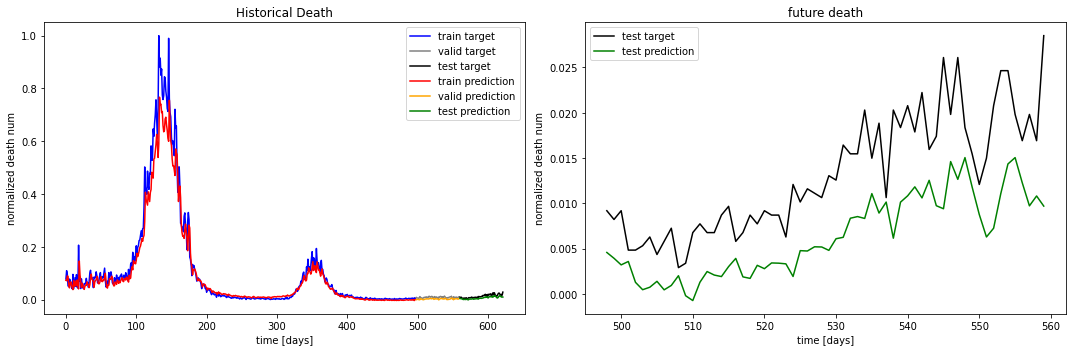

In [ ]:
ft = 0 

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('Historical Death')
plt.xlabel('time [days]')
plt.ylabel('normalized death num')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future death')
plt.xlabel('time [days]')
plt.ylabel('normalized death num')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print("Berikut adalah perbandingan angka kematian dari training, testing, validasi, dan prediksi")

### Predicting confirmed case with vacc 1 and 2 as inputs


In [ ]:
train_df = mergedDf[["jumlah_positif", "jumlah_vaksinasi_1_saja_kumulatif", "jumlah_vaksinasi_2_kumulatif"]]
train_df

,jumlah_positif,jumlah_vaksinasi_1_saja_kumulatif,jumlah_vaksinasi_2_kumulatif
0,5589,2594076,1572786
1,5414,2752202,1716749
2,6825,2829108,1876140
3,6570,2890221,1948531
4,6279,2890663,2068400
...,...,...,...
620,5976,33024586,172384615
621,5469,33024586,172384615
622,4151,33024586,172384615
623,3225,29596134,174119714


In [ ]:
valid_set_size_percentage = 10 
test_set_size_percentage = 10 
def normalize_data(df):
    min_max_scaler = MinMaxScaler()
    df['jumlah_positif'] = min_max_scaler.fit_transform(df.jumlah_positif.values.reshape(-1,1))
    df['jumlah_vaksinasi_1_saja_kumulatif'] = min_max_scaler.fit_transform(df.jumlah_vaksinasi_1_saja_kumulatif.values.reshape(-1,1))
    df['jumlah_vaksinasi_2_kumulatif'] = min_max_scaler.fit_transform(df.jumlah_vaksinasi_2_kumulatif.values.reshape(-1,1))
    return df

In [ ]:
def load_data(covid, seq_len):
    data_raw = covid.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

train_df_norm = normalize_data(train_df)
seq_len = 3 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(train_df, seq_len)

print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)


x_train.shape =  (498, 2, 3)
y_train.shape =  (498, 3)
x_valid.shape =  (62, 2, 3)
y_valid.shape =  (62, 3)
x_test.shape =  (62, 2, 3)
y_test.shape =  (62, 3)


In [ ]:
## Basic Cell RNN in tensorflow

index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# parameters
n_steps = seq_len-1 
n_inputs = len(train_df.columns) 
n_neurons = 200 
n_outputs = len(train_df.columns) 
n_layers = 3
learning_rate = 0.0001
batch_size = 5
n_epochs = 150
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.compat.v1.reset_default_graph()
tf.compat.v1.disable_eager_execution()
X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.compat.v1.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
layers = [tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
          for layer in range(n_layers)]

                                                                     
multi_layer_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(layers)
rnn_outputs, states = tf.compat.v1.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.compat.v1.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)
                                              
# run graph
with tf.compat.v1.Session() as sess: 
    sess.run(tf.compat.v1.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

0.00 epochs: MSE train/valid = 0.163560/0.256830
5.00 epochs: MSE train/valid = 0.001920/0.001753
10.00 epochs: MSE train/valid = 0.001201/0.000338
15.00 epochs: MSE train/valid = 0.001392/0.000653
20.00 epochs: MSE train/valid = 0.001143/0.000198
25.00 epochs: MSE train/valid = 0.001253/0.000389
30.00 epochs: MSE train/valid = 0.001042/0.000358
35.00 epochs: MSE train/valid = 0.001038/0.000316
40.00 epochs: MSE train/valid = 0.000886/0.000089
45.00 epochs: MSE train/valid = 0.001138/0.000080
50.00 epochs: MSE train/valid = 0.000964/0.000193
55.00 epochs: MSE train/valid = 0.000975/0.000123
60.00 epochs: MSE train/valid = 0.001104/0.000135
65.00 epochs: MSE train/valid = 0.001041/0.000250
70.00 epochs: MSE train/valid = 0.000869/0.000107
75.00 epochs: MSE train/valid = 0.001182/0.000077
80.00 epochs: MSE train/valid = 0.001304/0.000644
85.00 epochs: MSE train/valid = 0.000867/0.000069
90.00 epochs: MSE train/valid = 0.001047/0.000174
95.00 epochs: MSE train/valid = 0.000898/0.000075
10

Berikut adalah perbandingan angka kematian dari training, testing, validasi, dan prediksi


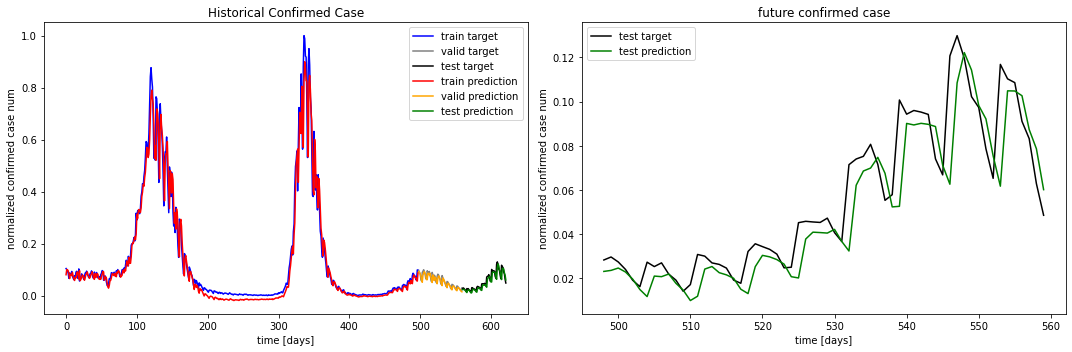

In [ ]:
ft = 0 

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('Historical Confirmed Case')
plt.xlabel('time [days]')
plt.ylabel('normalized confirmed case num')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future confirmed case')
plt.xlabel('time [days]')
plt.ylabel('normalized confirmed case num')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print("Berikut adalah perbandingan angka kematian dari training, testing, validasi, dan prediksi")